# Conhecendo os Dados

## Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [25]:
import pandas as pd

df = pd.read_csv('dados.csv')

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Tipos de dados

### Variáveis qualitativas ordinais
#### Variáveis que podem ser ordenadas ou hierarquizadas

In [26]:
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais
#### Variáveis que não podem ser ordenadas ou hierarquizadas

In [27]:
sorted(df['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [28]:
sorted(df['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas
#### Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável

In [29]:
df['Idade'].min()

13

### Variáveis quantitativas contínuas

#### Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [30]:
df['Altura'].max()

2.028496765

## Distribuição de frequências

### Distribuição de frequências para variáveis qualitativas

In [31]:
# 0 = Homens
# 1 = Mulheres

frequencia = df['Sexo'].value_counts()

frequencia

0    53250
1    23590
Name: Sexo, dtype: int64

In [32]:
#Porcentagem

percentual = df['Sexo'].value_counts(normalize = True) * 100

percentual

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [33]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

dist_freq

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [34]:
dist_freq.rename({0: 'Masculino', 1:'Feminino'}, inplace=True)
dist_freq.rename_axis('Sexo', axis='columns', inplace=True)

dist_freq

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [35]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

percentual = pd.crosstab(df.Sexo,
                         df.Cor,
                         aggfunc = 'mean',
                         values = df.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### Distribuição de frequências para variáveis quantitativas

In [36]:
df['Renda'].min()

0

In [37]:
df['Renda'].max()

200000

In [38]:
#Tabela de Frequências

classes = [0, 1576, 3152, 7880, 15760, 200000]

labels = ['E', 'D', 'C', 'B', 'A']

frequencia = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)

percentual = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)

dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [39]:
#Classes de amplitude fixa
#A regra de Sturges é um método para definição do número de classes, baseado no total de observações de uma variável

import numpy as np

n = df.shape[0]
k = 1 + (10 / 3) * np.log10(n)

k

17.285291187298853

In [40]:
k = int(k.round(0))

k

17

In [41]:
frequencia = pd.value_counts(
pd.cut(
    x = df['Renda'],
    bins = k,
    include_lowest = True
),
    sort = False
)

percentual = pd.value_counts(
pd.cut(
    x = df['Renda'],
    bins = k,
    include_lowest = True
),
    sort = False,
    normalize = True
)

dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_quantitativas_amplitude_fixa.sort_index(ascending = True)

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


#### Histograma

Text(0.5, 0, 'Metros')

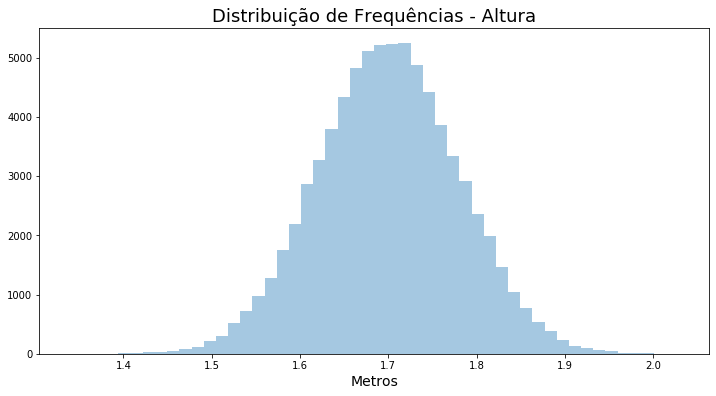

In [42]:
import seaborn as sns

ax = sns.distplot(df.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

Text(0.5, 0, 'Metros')

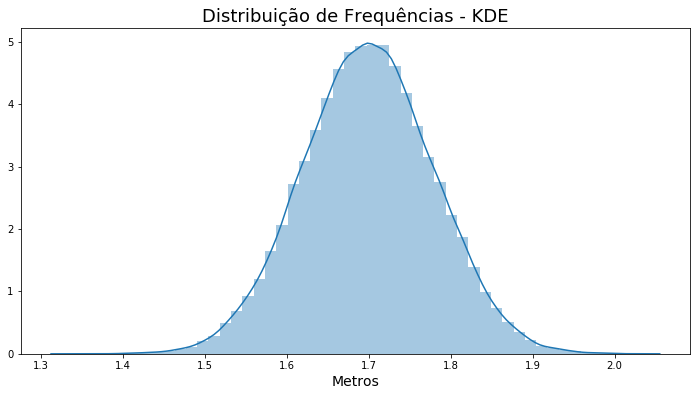

In [43]:
import seaborn as sns

ax = sns.distplot(df.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

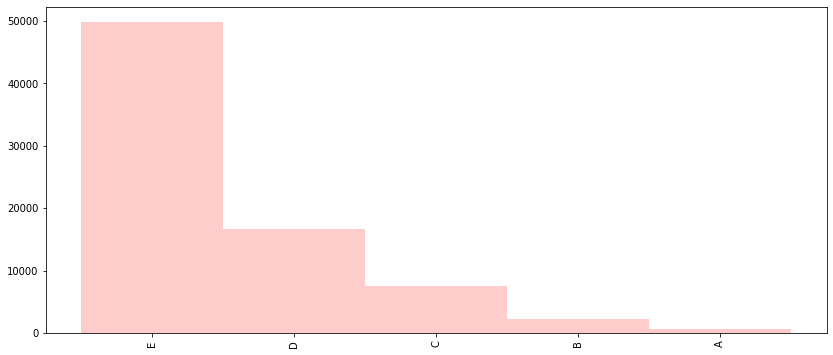

In [44]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width=1, color = 'red', alpha = 0.2, figsize = (14, 6))

## Medidas de tendência central

### Média aritmética

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

In [45]:
# A média é muito afetada pelos extremos

notas = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
notas.rename_axis('Matérias', axis = 'columns', inplace = True)
notas

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [46]:
notas['Fulano'].mean()

7.714285714285714

In [48]:
df['Renda'].mean()

2000.3831988547631

In [49]:
df.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Mediana

In [74]:
# Valor que divide a série ao meio

fulano = notas.Fulano
fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [78]:
fulano = notas.Fulano.sort_values()
fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [79]:
fulano = notas.Fulano.reset_index()
fulano

,index,Fulano
0,Matemática,8
1,Português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


In [80]:
n = fulano.shape[0]
n

7

In [81]:
elemento_mediano = (n + 1) / 2
elemento_mediano

4.0

In [83]:
fulano.loc[elemento_mediano - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [84]:
fulano.median()

Fulano    8.0
dtype: float64

In [85]:
df['Renda'].median()

1200.0

In [86]:
df['Renda'].quantile()

1200.0

### Moda

In [88]:
# Valor mais frequente em um conjunto
# Pode ser multimodal

notas.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [89]:
df['Renda'].mode()

0    788
dtype: int64

In [90]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

### Relação entre média, mediana e moda

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>